In [209]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def make_ellipses(mean, cov, ax, confidence=5.991, alpha=0.3, color="blue", eigv=False, arrow_color_list=None):
    """
    多元正态分布
    mean: 均值
    cov: 协方差矩阵
    ax: 画布的Axes对象
    confidence: 置信椭圆置信率 # 置信区间， {90%: 4.605, 95%: 5.991, 99%: 9.21}
    alpha: 椭圆透明度
    eigv: 是否画特征向量
    arrow_color_list: 箭头颜色列表
    """
    lambda_, v = np.linalg.eig(cov)    # 计算特征值lambda_和特征向量v
    sqrt_lambda = np.sqrt(np.abs(lambda_))    # 存在负的特征值， 无法开方，取绝对值

    print("sqrt_lambda: ", sqrt_lambda)
    print("lw: ", sqrt_lambda * 2 * np.sqrt(confidence))
    
    color_ = ['r','b', 'g']
    for idx, sub_s in enumerate([4.605, 5.991, 9.21]):
        s = sub_s
        width = 2 * np.sqrt(s) * sqrt_lambda[0]    # 计算椭圆的两倍长轴
        height = 2 * np.sqrt(s) * sqrt_lambda[1]   # 计算椭圆的两倍短轴
        angle = np.rad2deg(np.arccos(v[0, 0]))    # 计算椭圆的旋转角度
        
        ell = mpl.patches.Ellipse(xy=mean, width=width, height=height, angle=angle, color=color_[idx])    # 绘制椭圆

        ax.add_artist(ell)
        ell.set_alpha(alpha)
    
    
    # 是否画出特征向量
    if eigv:
        # print "type(v): ", type(v)
        if arrow_color_list is None:
            arrow_color_list = [color for i in range(v.shape[0])]
        for i in range(v.shape[0]):
            v_i = v[:, i]
            scale_variable = np.sqrt(s) * sqrt_lambda[i]
            # 绘制箭头
            """
            ax.arrow(x, y, dx, dy,    # (x, y)为箭头起始坐标，(dx, dy)为偏移量
                     width,    # 箭头尾部线段宽度
                     length_includes_head,    # 长度是否包含箭头
                     head_width,    # 箭头宽度
                     head_length,    # 箭头长度
                     color,    # 箭头颜色
                     )
            """
            ax.arrow(mean[0], mean[1], scale_variable*v_i[0], scale_variable * v_i[1], 
                     width=0.05, 
                     length_includes_head=True, 
                     head_width=0.2, 
                     head_length=0.3,
                     color=arrow_color_list[i])

def plot_2D_gaussian_sampling(mean, cov, ax, data_num=100, confidence=4.605, color="blue", alpha=0.3, eigv=False):
    """
    mean: 均值
    cov: 协方差矩阵
    ax: Axes对象
    confidence: 置信椭圆的置信率
    data_num: 散点采样数量
    color: 颜色
    alpha: 透明度
    eigv: 是否画特征向量的箭头
    """
    if isinstance(mean, list) and len(mean) > 2:
        # print "多元正态分布，多于2维"
        mean = mean[:2]
        cov_temp = []
        for i in range(2):
            cov_temp.append(cov[i][:2])
        cov = cov_temp
    elif isinstance(mean, np.ndarray) and mean.shape[0] > 2:
        mean = mean[:2]
        cov = cov[:2, :2]
    data = np.random.multivariate_normal(mean, cov, 100) # 根据均值和协方差进行点云采样
    err_ = (data - mean)
    # print(err_)
    val_ = (err_ .dot(np.linalg.inv(cov))).dot(err_.T)
    # print(val_.diagonal())
    
    x, y = data.T
    plt.scatter(x, y, s=10, c=color)
    plt.axis([-2, 8, -5, 5])
    make_ellipses(mean, cov, ax, confidence=confidence, color=color, alpha=alpha, eigv=eigv)

sqrt_lambda:  [1.48563346 0.89044552]
lw:  [6.37612005 3.82166104]


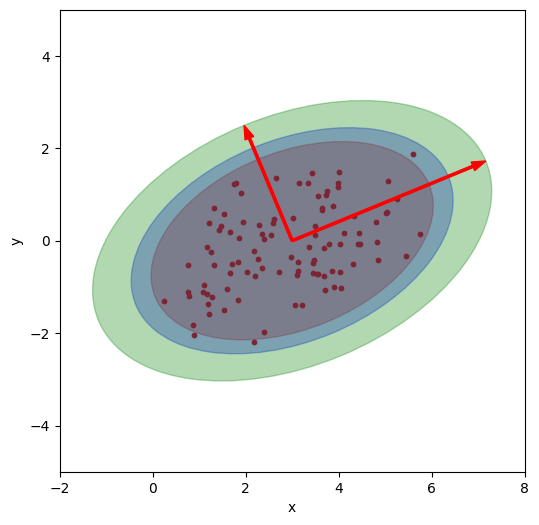

In [210]:
plt.rcParams["figure.figsize"] = (6.0, 6.0)
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")

# 定义均值和协方差
mean = [3, 0] 
cov = [[2, 0], 
       [0, 1]]

cov = [[2, 0.5], 
       [0.5, 1]]

plot_2D_gaussian_sampling(mean=mean, cov=cov, ax=ax, eigv=True, color="r")
